In [1]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [2]:
import pandas as pd
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
columns =["Buying",
"Maintaince",
"Doors",
"Persons",
"Lug_boot",
"Safety","Class_value"]

In [4]:
df = pd.read_csv(car_data, names=columns)

In [5]:
df.dtypes

Buying         object
Maintaince     object
Doors          object
Persons        object
Lug_boot       object
Safety         object
Class_value    object
dtype: object

In [6]:
df

,Buying,Maintaince,Doors,Persons,Lug_boot,Safety,Class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
df.shape

(1728, 7)

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1728 non-null   object
 1   Maintaince   1728 non-null   object
 2   Doors        1728 non-null   object
 3   Persons      1728 non-null   object
 4   Lug_boot     1728 non-null   object
 5   Safety       1728 non-null   object
 6   Class_value  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Buying         0
Maintaince     0
Doors          0
Persons        0
Lug_boot       0
Safety         0
Class_value    0
dtype: int64

In [9]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [10]:
X

,Buying,Maintaince,Doors,Persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [11]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class_value, Length: 1728, dtype: object

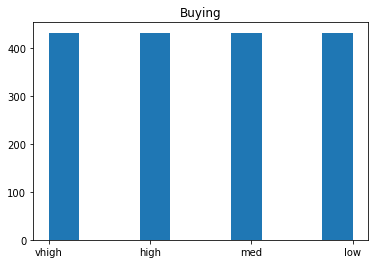

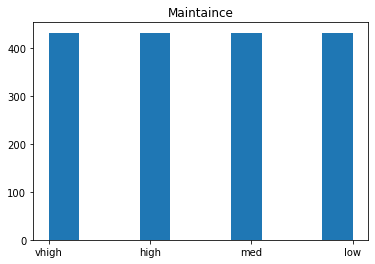

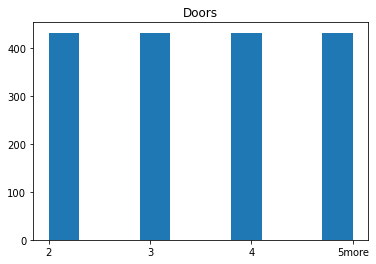

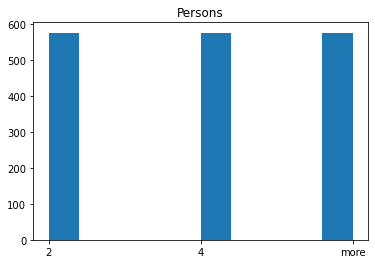

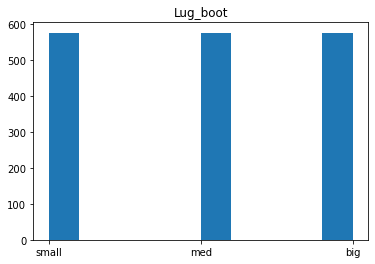

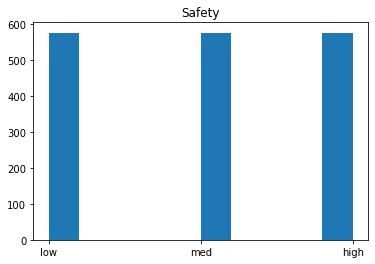

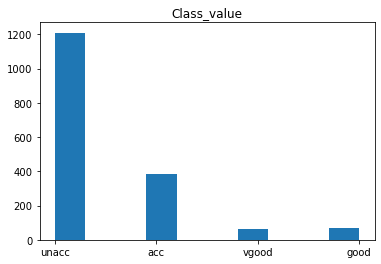

In [12]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [13]:
for col_name in df.columns:
    print(df[col_name].value_counts())  

high     432
med      432
low      432
vhigh    432
Name: Buying, dtype: int64
high     432
med      432
low      432
vhigh    432
Name: Maintaince, dtype: int64
2        432
5more    432
3        432
4        432
Name: Doors, dtype: int64
2       576
more    576
4       576
Name: Persons, dtype: int64
small    576
med      576
big      576
Name: Lug_boot, dtype: int64
high    576
med     576
low     576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Class_value, dtype: int64


In [14]:
df['Class_value'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class_value, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3,stratify=y)

In [17]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [18]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X_train = le.fit_transform(X_train)
X_test = le.transform(X_test)

In [19]:
X_test

array([[1., 3., 1., 2., 0., 0.],
       [2., 2., 2., 0., 0., 0.],
       [2., 1., 0., 2., 0., 0.],
       ...,
       [2., 1., 1., 1., 2., 0.],
       [3., 2., 3., 1., 1., 2.],
       [0., 3., 0., 2., 0., 0.]])

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
dt_clf = RandomForestClassifier(criterion='gini',random_state=42,max_depth=12,n_estimators=100)
dt_clf = dt_clf.fit(X_train, y_train)

In [77]:
len(dt_clf.estimators_)

100

[Text(3278.122718978102, 2613.4615384615386, 'Persons <= 0.5\ngini = 0.458\nsamples = 772\nvalue = [283, 40, 842, 44]'),
 Text(3237.3927919708026, 2404.3846153846152, 'gini = 0.0\nsamples = 252\nvalue = [0, 0, 392, 0]'),
 Text(3318.852645985401, 2404.3846153846152, 'Buying <= 2.5\ngini = 0.571\nsamples = 520\nvalue = [283, 40, 450, 44]'),
 Text(1597.3768248175181, 2195.3076923076924, 'Buying <= 0.5\ngini = 0.609\nsamples = 401\nvalue = [237, 40, 309, 44]'),
 Text(409.84489051094886, 1986.2307692307693, 'Doors <= 0.5\ngini = 0.467\nsamples = 151\nvalue = [89, 0, 150, 0]'),
 Text(203.64963503649633, 1777.1538461538462, 'Maintaince <= 2.5\ngini = 0.475\nsamples = 43\nvalue = [28, 0, 44, 0]'),
 Text(162.91970802919707, 1568.076923076923, 'Safety <= 0.5\ngini = 0.499\nsamples = 35\nvalue = [28, 0, 30, 0]'),
 Text(81.45985401459853, 1359.0, 'Lug_boot <= 1.5\ngini = 0.278\nsamples = 16\nvalue = [20, 0, 4, 0]'),
 Text(40.72992700729927, 1149.923076923077, 'gini = 0.0\nsamples = 10\nvalue = [13

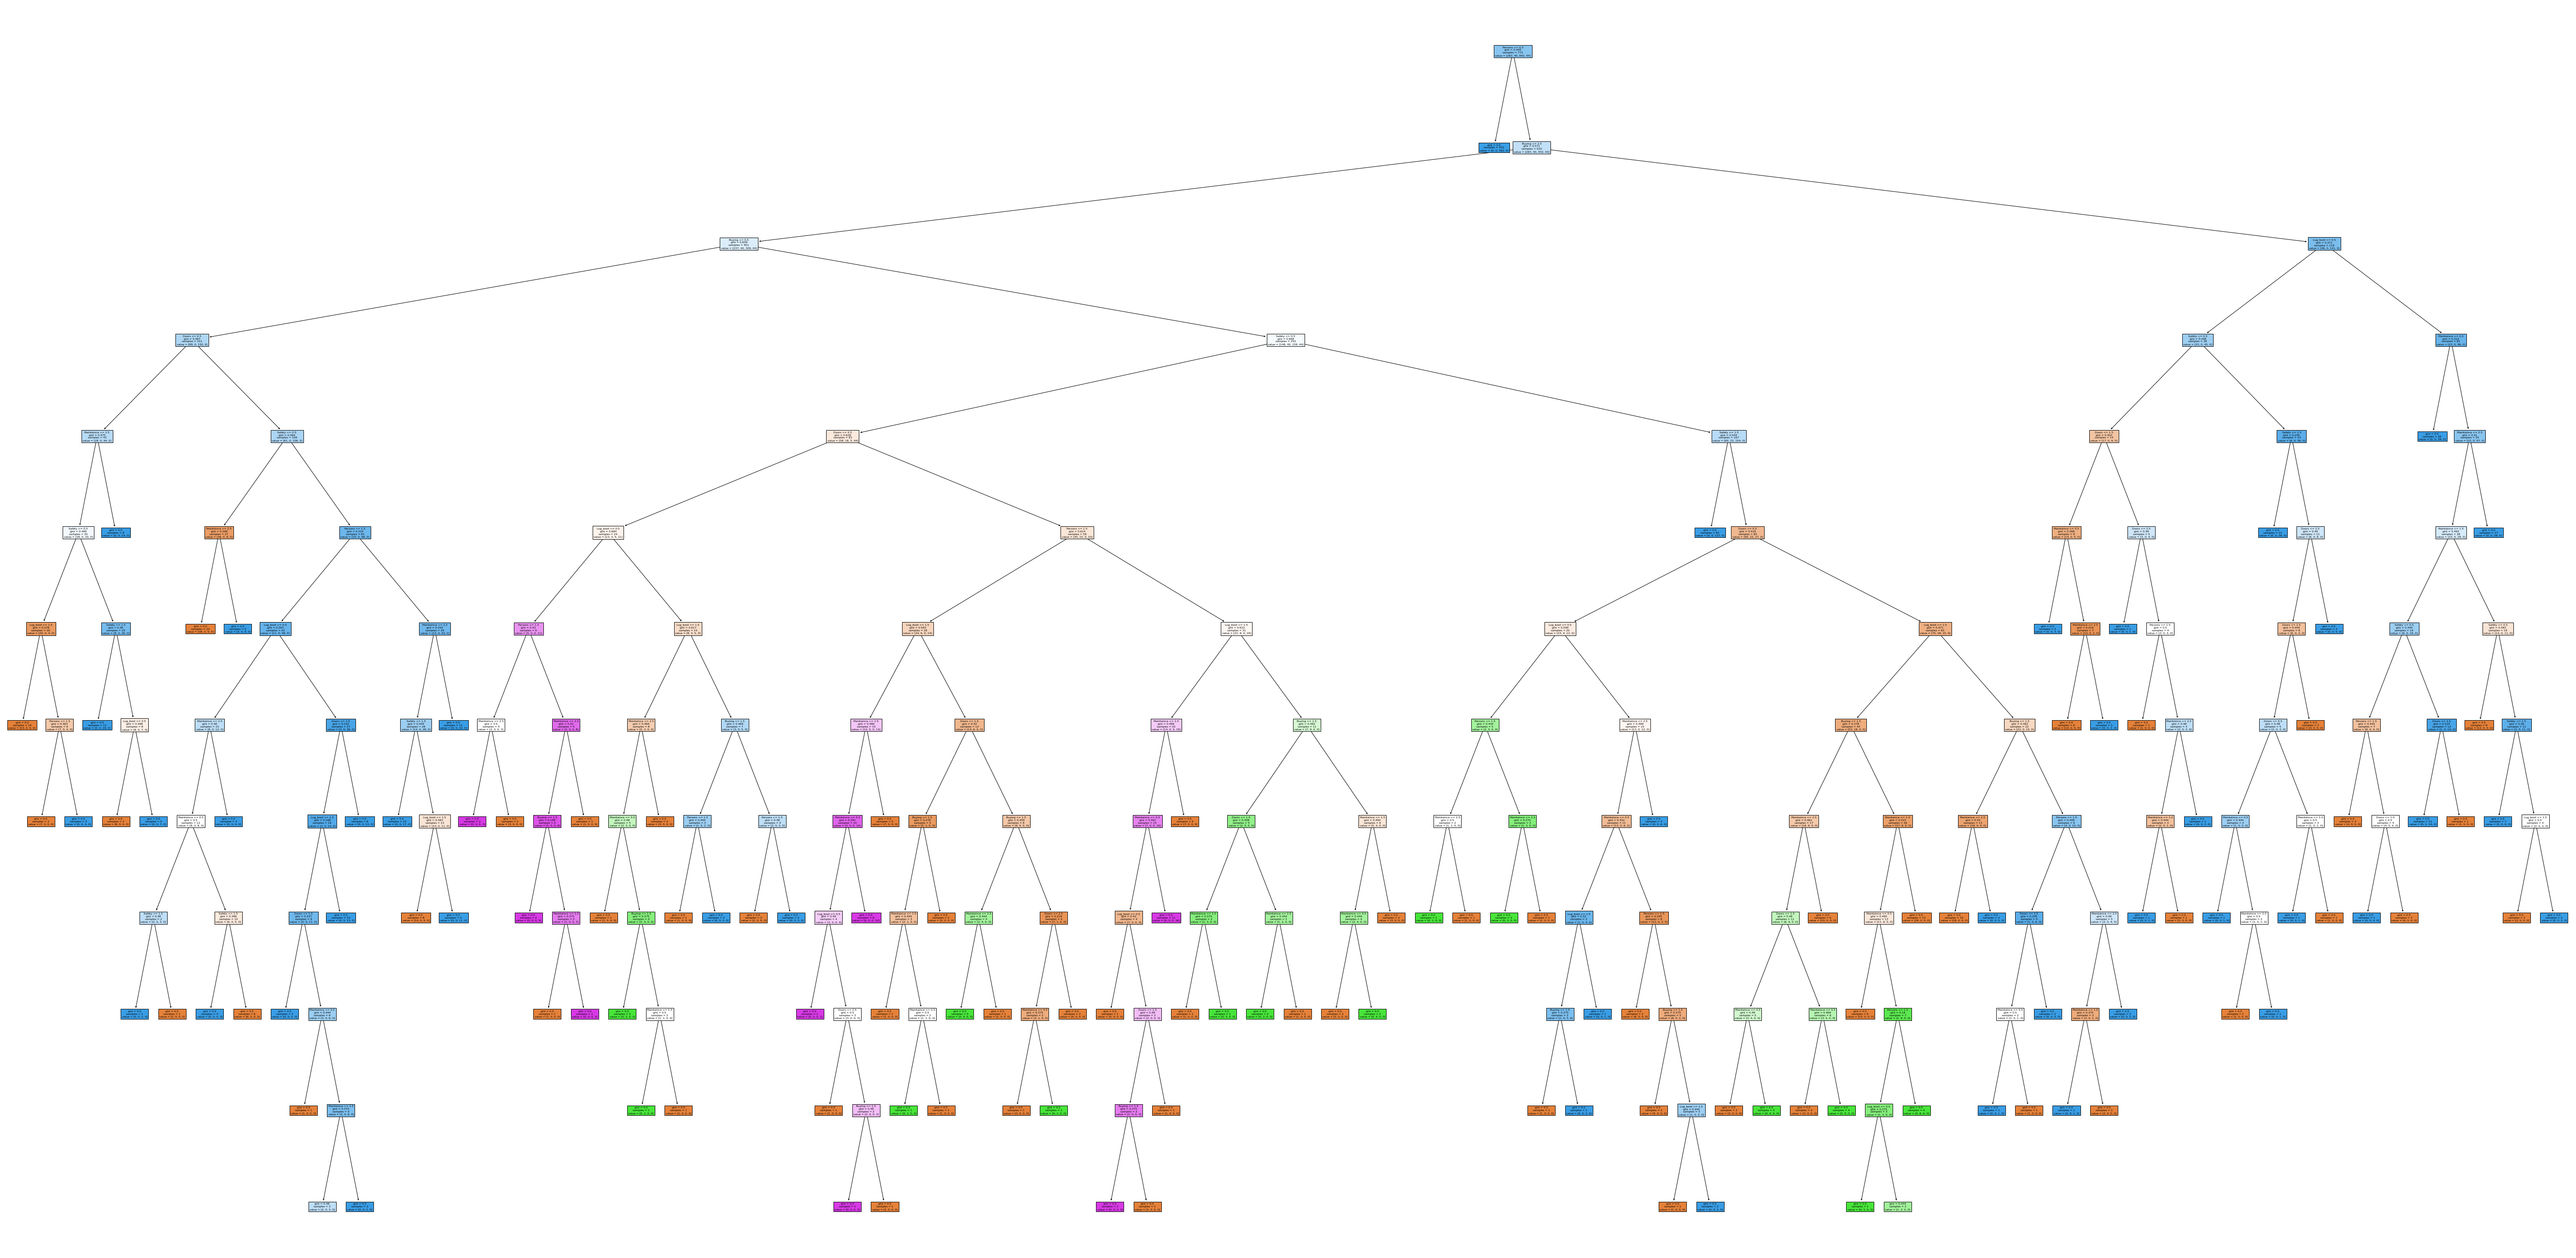

In [78]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn import tree
plt.figure(figsize=(100, 50))
tree.plot_tree(dt_clf.estimators_[0], feature_names=X.columns, filled=True)

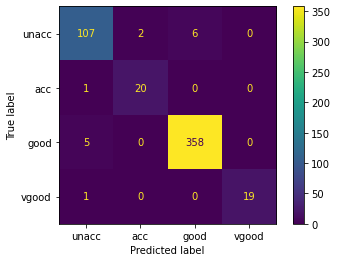

In [79]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [80]:
predictions = dt_clf.predict(X_test)

In [81]:
accuracy = (predictions==y_test).sum()/(len(y_test))
accuracy

0.9710982658959537

In [82]:
accuracy = accuracy*100
accuracy

97.10982658959537